In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('creditcard.csv')
# Display the first five rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Print the shape of the data
print(df.shape)

(284807, 31)


In [6]:
df.duplicated().any()

np.True_

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(283726, 31)

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [10]:
# Determine number of fraud cases in dataset
# The classes are heavily skewed
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


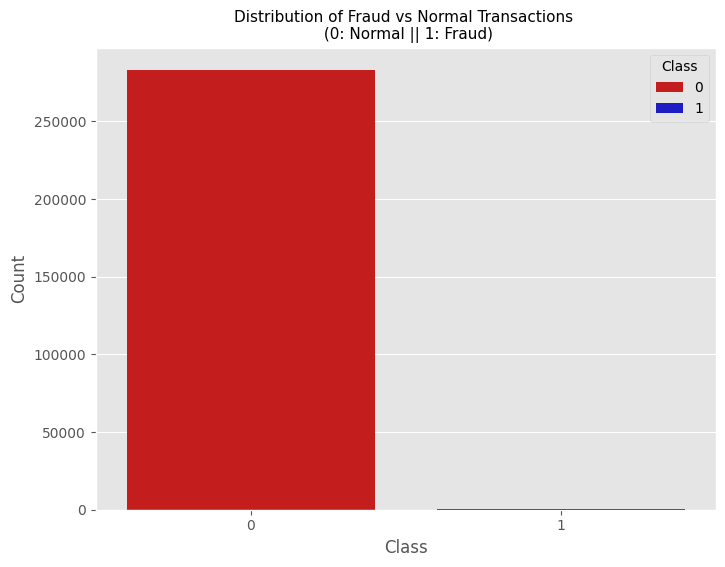

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
colors = [ "#DF0101", "#0101DF"]
sns.countplot(x='Class', data = df, palette=colors, hue='Class')
plt.title('Distribution of Fraud vs Normal Transactions \n (0: Normal || 1: Fraud)', fontsize=11)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

C:\Users\Nitesh Kumar\AppData\Local\Temp\ipykernel_21800\2350464115.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount)


<Axes: ylabel='Density'>

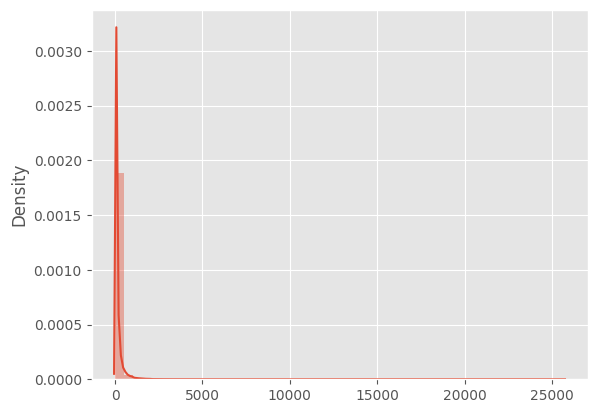

In [12]:
# distribution of Amount
amount = [df['Amount'].values]
sns.distplot(amount)

C:\Users\Nitesh Kumar\AppData\Local\Temp\ipykernel_21800\713631297.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time)


<Axes: ylabel='Density'>

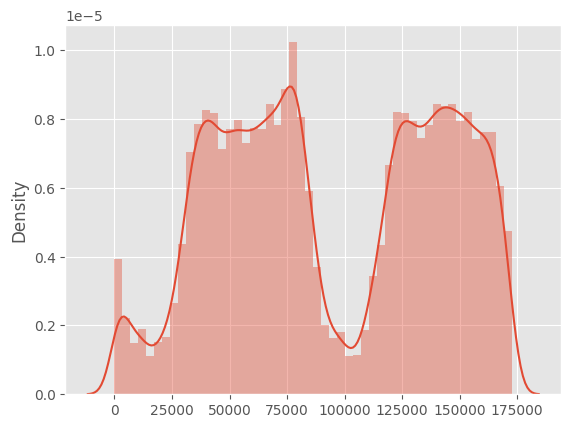

In [13]:
# distribution of Time
time = df['Time'].values
sns.distplot(time)

## Trying Random Forest For Original Imbalanced Data

In [14]:
#seperating the X and the Y from the dataset
X=df.drop(['Class'], axis=1)
Y=df["Class"]
print(X.shape)
print(Y.shape)
#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

(283726, 30)
(283726,)


In [15]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [16]:
# Random forest model creation with n_estimators set to 100
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', n_jobs=-1, random_state=42)
rfc.fit(X_train, Y_train)
# Predictions
y_pred = rfc.predict(X_test)

In [17]:
# n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Random Forest classifier
The accuracy is  0.9995065731505305
The precision is 0.9696969696969697
The recall is 0.7111111111111111
The F1-Score is 0.8205128205128205
The Matthews correlation coefficient is 0.8301818336698826


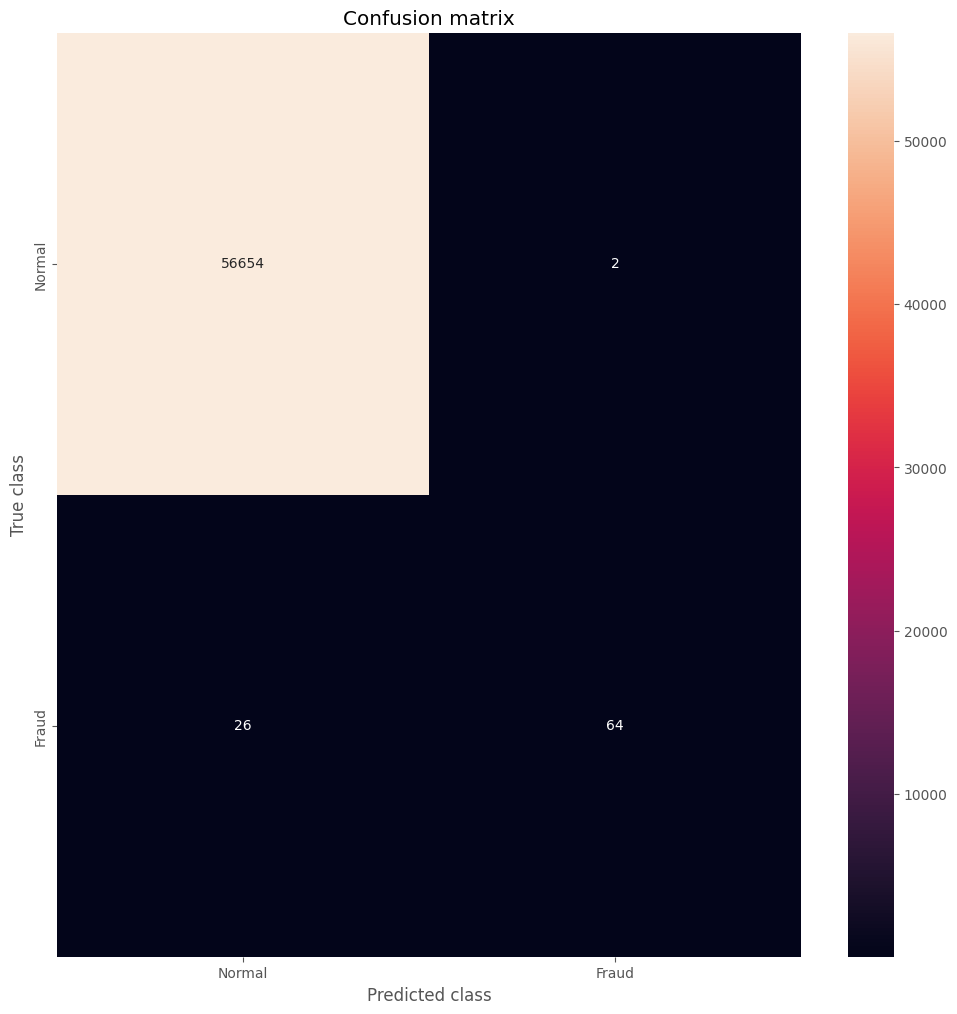

In [18]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [19]:
# Run classification metrics
print("accuracy_score",accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

accuracy_score 0.9995065731505305
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.71      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



It is the case of Overfitting

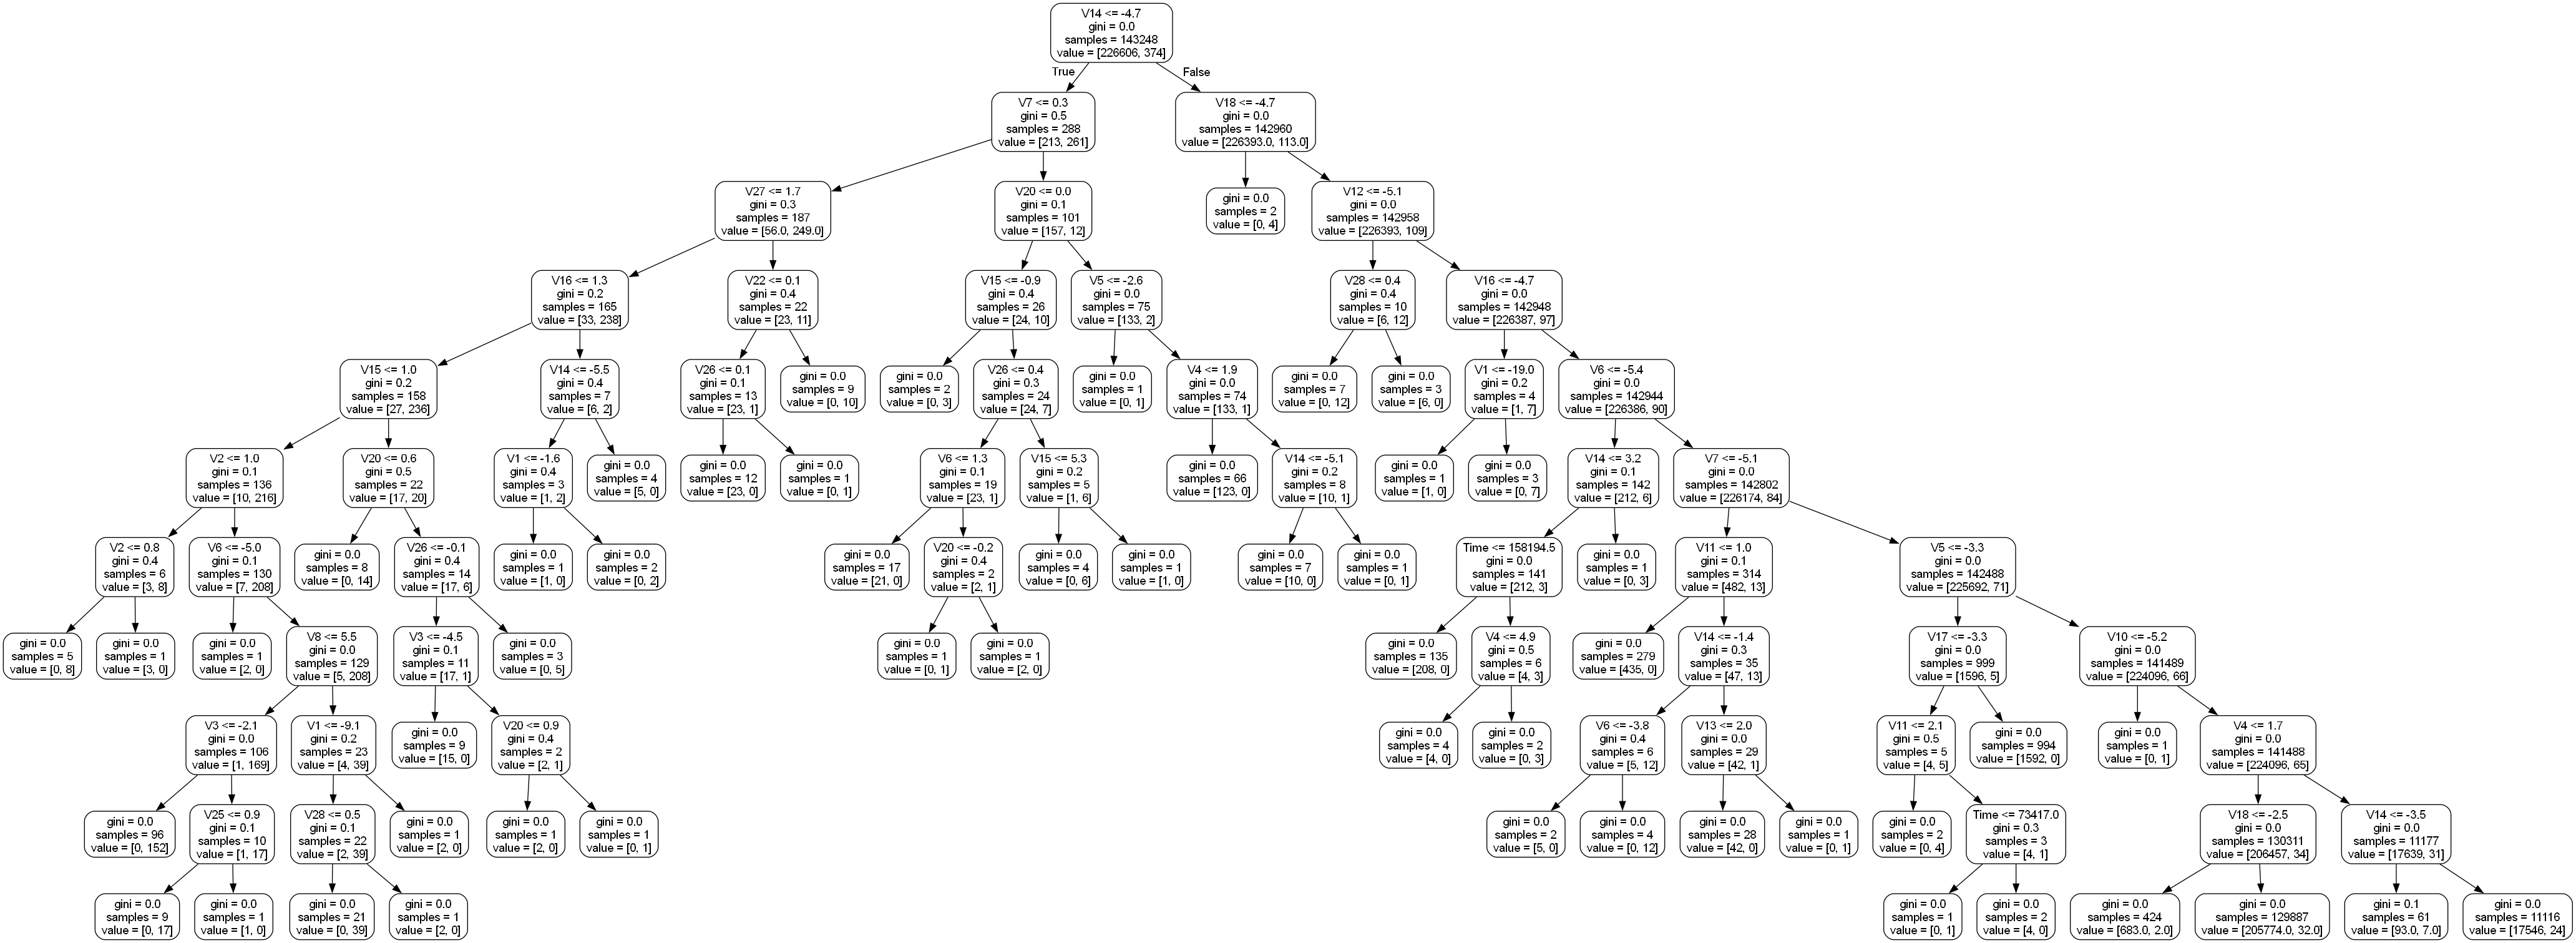

In [20]:
# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

#visualizing the random tree
feature_list = list(X.columns)

#pulling out one tree from the forest
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
display(Image(graph.create_png()))

## HANDLING IMBALANCED DATA

## Scaling and Distributing
In this phase of our kernel, we will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
We concat the 492 cases of fraud and non fraud, creating a new sub-sample.

### Scaling Time and Amount

In [21]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [22]:
scaled_amount = df['scaled_amount']
# scaled_time = df['scaled_time']

df.drop(['scaled_amount'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
# df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Under Sampling

In [23]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
legit_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, legit_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
72235,-0.290919,1.258027,-0.075276,0.309407,-0.108806,-0.521758,-0.708895,-0.170085,-0.039882,0.400551,...,-0.168669,-0.094919,-0.266587,0.089141,0.119204,0.134321,0.993353,-0.073665,-0.002132,0
229730,-0.275066,1.894036,1.905806,-3.515730,4.508913,2.044466,-1.420468,1.057480,-0.281157,-1.832604,...,-0.160163,-0.144713,-0.310108,-0.101530,-0.414960,0.376597,0.150778,-0.013712,0.048084,1
6108,0.514532,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
18466,-0.296482,1.102804,2.829168,-3.932870,4.707691,2.937967,-1.800904,1.672734,-0.300240,-2.783011,...,-0.030880,-0.106994,-0.250050,-0.521627,-0.448950,1.291646,0.516327,0.009146,0.153318,1
8842,-0.305938,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,...,-0.158971,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,1


In [24]:
X = new_df.drop(columns = 'Class')
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)

#### 1. Logistic Regression

In [25]:
#Testing model on under sampled data
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test,y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Recall Score: 0.94
Precision Score: 0.94
F1 Score: 0.94
Accuracy Score: 93.78%


In [26]:
#Testing model on Orignal data
X=df.drop(['Class'], axis=1)
Y=df["Class"]
org_X_train, org_X_test, org_Y_train, org_Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
org_y_pred = model.predict(org_X_test)
print('Recall Score: {:.2f}'.format(recall_score(org_Y_test,org_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(org_Y_test,org_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(org_Y_test, org_y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(org_Y_test, org_y_pred)*100))


Recall Score: 0.95
Precision Score: 0.04
F1 Score: 0.08
Accuracy Score: 96.23%


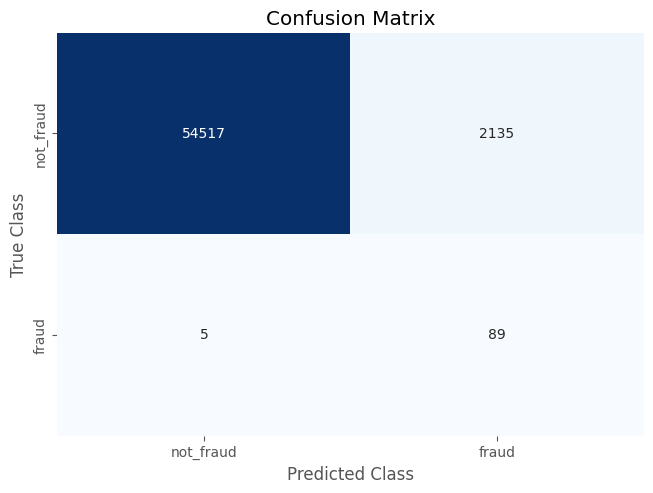

In [27]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(org_Y_test, org_y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

#### 2. Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
#Testing model on under sampled data
y_pred = dt.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test,y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Recall Score: 0.87
Precision Score: 0.86
F1 Score: 0.87
Accuracy Score: 87.05%


In [30]:
#Testing model on Orignal data
X=df.drop(['Class'], axis=1)
Y=df["Class"]
org_X_train, org_X_test, org_Y_train, org_Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
org_y_pred = dt.predict(org_X_test)
print('Recall Score: {:.2f}'.format(recall_score(org_Y_test,org_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(org_Y_test,org_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(org_Y_test, org_y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(org_Y_test, org_y_pred)*100))

Recall Score: 0.98
Precision Score: 0.02
F1 Score: 0.03
Accuracy Score: 90.30%


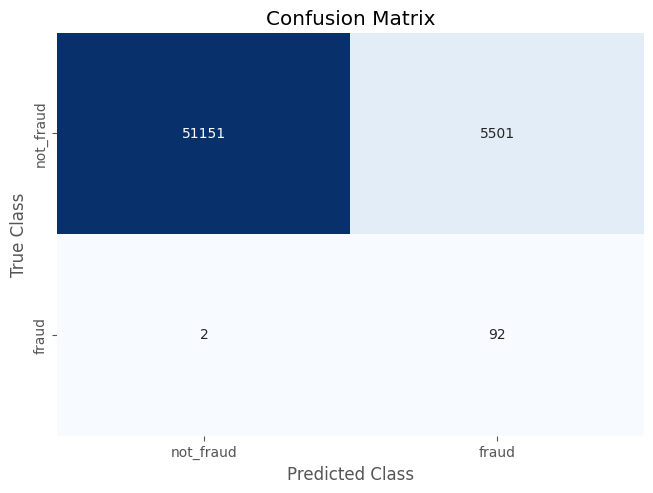

In [31]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(org_Y_test, org_y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

####3. Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
#Testing model on under sampled data
y_pred = rf.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test,y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Recall Score: 0.93
Precision Score: 0.95
F1 Score: 0.94
Accuracy Score: 93.78%


In [34]:
#Testing model on Orignal data
X=df.drop(['Class'], axis=1)
Y=df["Class"]
org_X_train, org_X_test, org_Y_train, org_Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
org_y_pred = rf.predict(org_X_test)
print('Recall Score: {:.2f}'.format(recall_score(org_Y_test,org_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(org_Y_test,org_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(org_Y_test, org_y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(org_Y_test, org_y_pred)*100))

Recall Score: 0.99
Precision Score: 0.05
F1 Score: 0.10
Accuracy Score: 96.95%


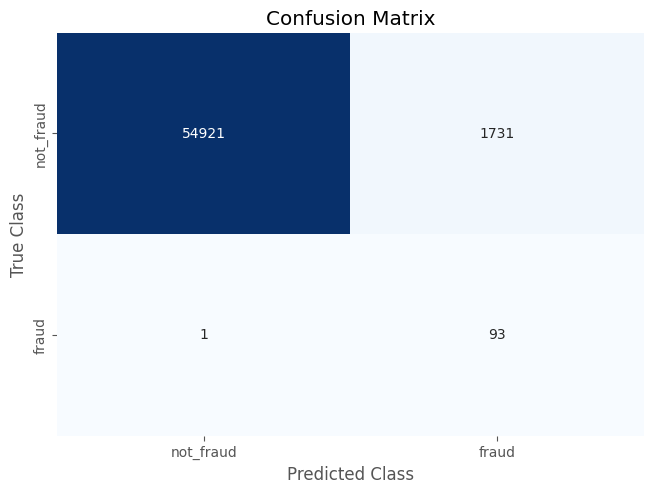

In [35]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(org_Y_test, org_y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### Over Sampling

In [36]:
X = df.drop('Class',axis=1)
y = df['Class']

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [39]:
y_res.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

#### 1. Logistic Regression

In [41]:
#Testing model on over sampled data
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test,y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Recall Score: 0.92
Precision Score: 0.97
F1 Score: 0.94
Accuracy Score: 94.40%


In [42]:
#Testing model on Orignal data
X=df.drop(['Class'], axis=1)
Y=df["Class"]
org_X_train, org_X_test, org_Y_train, org_Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
org_y_pred = model.predict(org_X_test)
print('Recall Score: {:.2f}'.format(recall_score(org_Y_test,org_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(org_Y_test,org_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(org_Y_test, org_y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(org_Y_test, org_y_pred)*100))

Recall Score: 0.95
Precision Score: 0.06
F1 Score: 0.11
Accuracy Score: 97.50%


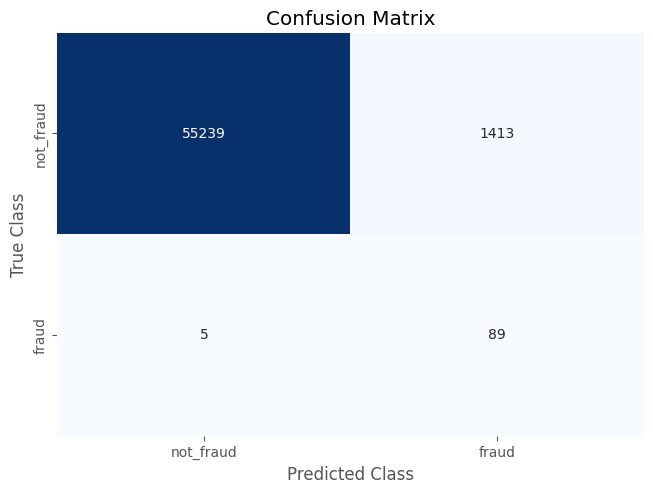

In [43]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(org_Y_test, org_y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

#### 2. Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
#Testing model on over sampled data
y_pred = dt.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test,y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 99.81%


In [46]:
#Testing model on Orignal data
X=df.drop(['Class'], axis=1)
Y=df["Class"]
org_X_train, org_X_test, org_Y_train, org_Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
org_y_pred = dt.predict(org_X_test)
print('Recall Score: {:.2f}'.format(recall_score(org_Y_test,org_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(org_Y_test,org_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(org_Y_test, org_y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(org_Y_test, org_y_pred)*100))

Recall Score: 1.00
Precision Score: 0.70
F1 Score: 0.82
Accuracy Score: 99.93%


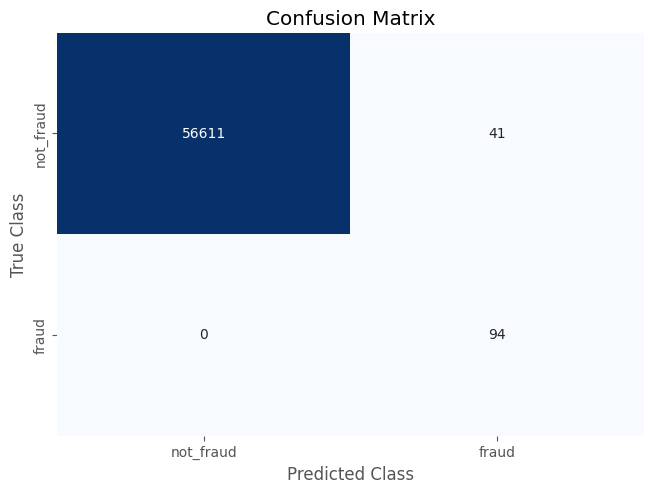

In [47]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(org_Y_test, org_y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

####3. Random Forest Classifier

In [48]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
#Testing model on over sampled data
y_pred = rf.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test,y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 99.99%


In [50]:
#Testing model on Orignal data
X=df.drop(['Class'], axis=1)
Y=df["Class"]
org_X_train, org_X_test, org_Y_train, org_Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
org_y_pred = rf.predict(org_X_test)
print('Recall Score: {:.2f}'.format(recall_score(org_Y_test,org_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(org_Y_test,org_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(org_Y_test, org_y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(org_Y_test, org_y_pred)*100))

Recall Score: 1.00
Precision Score: 0.97
F1 Score: 0.98
Accuracy Score: 99.99%


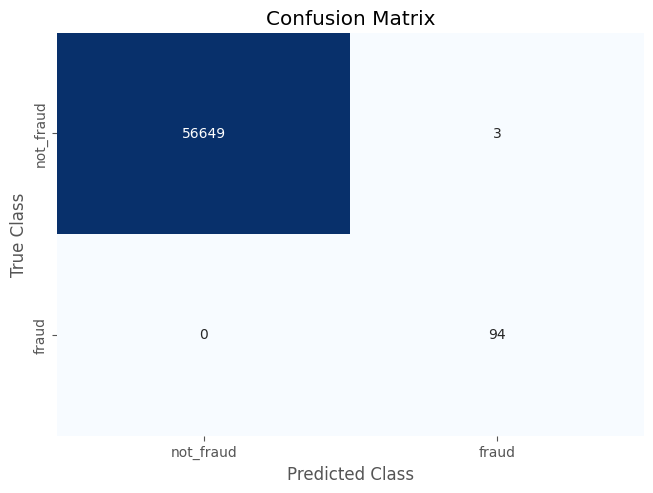

In [51]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(org_Y_test, org_y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

# Summary

<div align="center">

| Model           | Oversampling Accuracy      | Undersampling Accuracy     |
|:-----------------:|:-------------------------:|:-------------------------:|
| Logistic        |          97.6%             |           96.8%           |
| Decision Tree   |  99.9% (over-fitting)      |          88.29%           |
| Random Forest   |  100% (over-fitting)       |           97.2%           |

</div>  


Best model which handled the imbalanced data comes out to be Logistic Regression with SMOTE, having an accuracy of 97%.


# Final Model Creation

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)
final_model = LogisticRegression(max_iter=200)
final_model.fit(X_train.values,y_train.values)
y_pred = final_model.predict(X_test.values)
print('Recall Score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test,y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Recall Score: 0.92
Precision Score: 0.97
F1 Score: 0.94
Accuracy Score: 94.40%


# Prediciton with dummy data

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 111345 to 217439
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   scaled_amount  283726 non-null  float64
 1   V1             283726 non-null  float64
 2   V2             283726 non-null  float64
 3   V3             283726 non-null  float64
 4   V4             283726 non-null  float64
 5   V5             283726 non-null  float64
 6   V6             283726 non-null  float64
 7   V7             283726 non-null  float64
 8   V8             283726 non-null  float64
 9   V9             283726 non-null  float64
 10  V10            283726 non-null  float64
 11  V11            283726 non-null  float64
 12  V12            283726 non-null  float64
 13  V13            283726 non-null  float64
 14  V14            283726 non-null  float64
 15  V15            283726 non-null  float64
 16  V16            283726 non-null  float64
 17  V17            283726 non-nul

In [54]:
df.loc[df['Class']==1]

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
151011,-0.292032,-15.192064,10.432528,-19.629515,8.046075,-12.838167,-1.875859,-21.359738,-3.717850,-5.969782,...,1.657476,-3.474097,1.765446,1.701257,0.381587,-1.413417,-1.023078,-2.634761,-0.463931,1
83297,4.132944,-8.257111,-4.814461,-5.365307,1.204230,-3.347420,-1.331601,-1.967893,1.295438,-1.674415,...,-1.233987,0.436390,-0.077553,-3.091624,-0.390201,-0.288689,-0.340004,0.039819,-1.007900,1
68320,-0.295369,1.036639,0.407227,0.757706,3.161821,-0.568122,0.202181,-0.689804,0.411380,0.336769,...,-0.219461,-0.050108,0.123761,-0.132568,0.350231,0.507701,0.189621,0.061016,0.063141,1
118308,0.113197,-0.430330,0.985633,0.645789,0.317131,0.616332,-1.347462,1.078234,-0.161518,-0.492856,...,-0.115282,-0.016378,-0.207609,-0.164119,0.255280,0.454798,-0.505032,-0.039456,-0.006358,1
230476,1.012655,-0.099724,2.795414,-6.423856,3.247513,-1.632290,-2.766665,-2.312223,0.961014,-1.896001,...,0.340898,0.647714,0.126576,0.203953,0.008495,-0.174501,0.575295,0.152876,-0.098173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229730,-0.275066,1.894036,1.905806,-3.515730,4.508913,2.044466,-1.420468,1.057480,-0.281157,-1.832604,...,-0.160163,-0.144713,-0.310108,-0.101530,-0.414960,0.376597,0.150778,-0.013712,0.048084,1
172787,1.705187,-2.628922,2.275636,-3.745369,1.226948,-1.132966,-1.256353,-1.752420,0.281736,-1.792343,...,0.133106,0.870730,1.269473,-0.265494,-0.480549,0.169665,0.096081,0.070036,0.063768,1
93486,-0.305938,1.079524,0.872988,-0.303850,2.755369,0.301688,-0.350284,-0.042848,0.246625,-0.779176,...,-0.252115,-0.023255,-0.158601,-0.038806,-0.060327,0.358339,0.076984,0.018936,0.060574,1
154694,4.518704,-2.877176,4.569649,-9.553069,4.441079,-3.653961,-1.877981,-3.514353,1.547608,-2.503304,...,0.105615,1.272896,1.300268,-0.003950,-0.360848,-0.597526,-0.390901,0.592197,-0.241010,1


In [55]:
df.loc[df['Class']==0]

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
111345,-0.153108,-0.596390,1.228444,1.029369,0.862474,-0.316276,-0.622932,0.315821,0.437529,-0.977706,...,-0.160093,0.256696,0.580275,-0.082815,0.528546,-0.318823,-0.360005,0.038481,0.092266,0
13501,-0.027813,1.366506,-0.467585,0.175018,-0.351562,-0.679936,-0.598841,-0.497292,-0.184343,0.670344,...,-0.072930,0.021863,0.333020,-0.119197,0.051309,0.656490,-0.072121,-0.027723,-0.006310,0
208695,0.495480,1.947342,-0.104262,-1.830739,0.573912,0.000435,-1.426064,0.203420,-0.273773,0.871375,...,-0.220055,0.208143,0.570296,-0.047703,-0.195955,0.164416,-0.093471,-0.021744,-0.026975,0
41903,-0.278404,1.194340,0.266638,0.637888,0.640479,-0.383464,-0.691140,0.044351,-0.132354,-0.099346,...,-0.085187,-0.199247,-0.506004,0.196833,0.416360,0.127393,0.101404,-0.007075,0.020630,0
159761,-0.180921,1.927351,-0.197973,-2.053014,0.036756,1.164684,1.159735,-0.268589,0.459589,0.514675,...,-0.314272,-0.282374,-0.733764,0.358543,-1.084450,-0.490049,0.284741,-0.029733,-0.059148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254477,-0.134752,-0.558088,0.992657,-2.029602,-1.290004,3.570099,3.162931,0.510352,0.882493,-0.092879,...,0.107417,0.040388,0.348185,-0.258127,0.557060,0.017638,0.689059,0.270287,0.267613,0
20156,0.249618,-0.804353,1.500409,0.791257,0.742037,-0.017790,-0.590039,0.776264,0.366494,-1.294256,...,0.130793,-0.174290,-0.610405,0.106277,0.289927,-0.193394,-0.662192,0.238310,0.135324,0
282222,-0.293561,2.088307,0.215906,-1.750605,0.372329,0.564815,-0.772789,0.236151,-0.272458,0.381914,...,-0.100665,-0.366096,-0.906507,0.311511,0.401095,-0.209466,0.178720,-0.057431,-0.030446,0
120771,-0.295369,1.200119,0.570777,0.228860,1.980725,0.789562,1.057889,-0.012110,0.208275,-1.076112,...,-0.062288,-0.247692,-0.726045,-0.017366,-1.370355,0.365441,-0.172565,0.011993,0.003258,0


In [56]:
X=df.drop(['Class'], axis=1)

In [57]:
X.iloc[61787].values

array([ 2.48671951,  0.92766406, -0.90318797, -0.17518931, -1.37690332,
       -0.63615213, -0.6299173 ,  0.08861535, -0.12478132,  1.27898284,
       -1.15485301, -0.29840318,  0.44471084, -0.13942083,  0.40176203,
        2.07092427, -0.45961697, -0.04954863, -0.59881669,  0.57612555,
        0.28593323, -0.18127892, -0.87535409, -0.0675798 , -0.42432994,
        0.15938757, -0.22277769, -0.02133441,  0.04534634])

In [58]:
if final_model.predict([X.loc[61787]])[0]==0:
  print('Normal Transaction')
else:
  print('Fraud Tracnsaction')

Fraud Tracnsaction


# Downloading the model

In [59]:
import joblib

In [60]:
joblib.dump(model, "final_model.pkl")

['final_model.pkl']